# Imports

In [1]:
import sys
 
# setting path
sys.path.append('..')

In [2]:
from model_builder import ModelBuilder
import matplotlib.pyplot as plt

2022-11-23 14:26:25.960501: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


/Users/margauxmforstyhe/Desktop/workspace/Earthshot Labs/workspace/Science/model_utilities/model_utilities


# Model

Initialize the model builder

In [3]:
model_builder = ModelBuilder()

# Create Dataset

We want to predict the deforestation risk using predictors such as terrain information, proximity to roads/pasture/agriculture/urbanization, population density, etc. 
Create the dataset for the training from the csv files that contains all the samples 

In [4]:
# Response variable is the deforestation risk value
response_variable=['deforestation_risk_Acre']

# Predictors names that we want to use for the training
# feature_names = ['brazil_roads',
#                  'elevation',
#                  'slope',
#                  'brazil_protected_areas',
#                  'population_density',
#                  'brazil_surrounding_forest',
#                  'brazil_pasture',
#                  'brazil_agriculture',
#                  'south_america_rivers',
#                  'urban_distance']
feature_names = ['brazil_roads',
                 'brazil_protected_areas',
                 'population_density',
                 'brazil_surrounding_forest',
                 'brazil_pasture',
                 'urban_distance']

gcp_bucket = 'eartshot-science-team'
gcp_folder_name = 'deforestation_risk'
samples_folder_name = f'Brazil_Acre_100km2_grids_samples_csv_scale30_1000numPoints'
name_csv_samples_merged_file = '/Users/margauxmforstyhe/Desktop/deforestation_risk/Brazil_Acre_100km2_grids_samples_csv_scale30_1000numPoints/Brazil_Acre_100km2_grids_samples_csv_scale30_1000numPoints_val_test_set_5km_buffer.csv'


Create the dataset with train, test and val splits

In [5]:
model_builder.train_val_test_split(response_variable=response_variable, 
                             samples_csv_local=True,
                             feature_names=feature_names, 
                             gcp_bucket=gcp_bucket, 
                             gcp_folder_name=gcp_folder_name, 
                             samples_folder_name= samples_folder_name, 
                             name_csv_samples_merged_file = name_csv_samples_merged_file, 
                             use_test_val_buffered_sets = False,
                             test_size=0.20,
                             # name_test_buffer_column='test_set_5km_buffer', 
                             # name_val_buffer_column='val_set_5km_buffer', 
                             # name_test_no_buffer_column='test_set_no_buffer', 
                             # name_val_no_buffer_column='val_set_no_buffer'
                            )

Reading sample csv file: /Users/margauxmforstyhe/Desktop/deforestation_risk/Brazil_Acre_100km2_grids_samples_csv_scale30_1000numPoints/Brazil_Acre_100km2_grids_samples_csv_scale30_1000numPoints_val_test_set_5km_buffer.csv...
We have 297322 samples
Training samples: 237857
Test samples: 59465
Validation samples: 0


Let's take a look at our training predictors:

In [6]:
model_builder.X_train.head()

,brazil_roads,brazil_protected_areas,population_density,brazil_surrounding_forest,brazil_pasture,urban_distance
74058,23818.293582,177674.320284,0.423144,918,40,20517
106018,15513.510126,29363.389572,1.860605,961,0,16865
19902,10640.357294,110540.556156,2.102675,532,429,11899
175334,224774.298513,130510.381483,0.036595,961,0,141130
188892,8515.704376,109.085874,6.680561,961,0,25273


Now our training targets:

In [7]:
model_builder.y_train.head(2)

,deforestation_risk_Acre
74058,0
106018,0


In [8]:
nb_forest_samples = model_builder.y_train[model_builder.y_train[response_variable[0]] == 0][response_variable[0]].count()
nb_deforested_samples = model_builder.y_train[model_builder.y_train[response_variable[0]] == 1][response_variable[0]].count()
print(f'There are {nb_forest_samples} forest samples and {nb_deforested_samples} deforested samples in training set')

# nb_forest_samples = model_builder.y_val[model_builder.y_val[response_variable[0]] == 0][response_variable[0]].count()
# nb_deforested_samples = model_builder.y_val[model_builder.y_val[response_variable[0]] == 1][response_variable[0]].count()
# print(f'There are {nb_forest_samples} forest samples and {nb_deforested_samples} deforested samples in validation set')

nb_forest_samples_test = model_builder.y_test[model_builder.y_test[response_variable[0]] == 0][response_variable[0]].count()
nb_deforested_samples_test = model_builder.y_test[model_builder.y_test[response_variable[0]] == 1][response_variable[0]].count()
print(f'There are {nb_forest_samples_test} forest samples and {nb_deforested_samples_test} deforested samples in test set')


There are 204451 forest samples and 33406 deforested samples in training set
There are 51199 forest samples and 8266 deforested samples in test set


In [9]:
# Training Predictors samples 
model_builder.X_train.shape

(237857, 6)

In [10]:
# Training Response samples 
model_builder.y_train.shape

(237857, 1)

In [11]:
# Test Predictors samples 
model_builder.X_test.shape

(59465, 6)

In [12]:
# Test Response samples 
model_builder.y_test.shape

(59465, 1)

In [13]:
model_builder.feature_names

['brazil_roads',
 'brazil_protected_areas',
 'population_density',
 'brazil_surrounding_forest',
 'brazil_pasture',
 'urban_distance']

In [14]:
model_builder.response_variable

['deforestation_risk_Acre']

# Hyperparameters tuning

Finding best hyperparameters with GridSearch: Takes a very long time!

In [15]:
# Uses val set 
best_params = model_builder.grid_search(n_estimators=[100, 200, 500], 
                                        max_features=['sqrt'], # , 'log2'
                                        max_depth=[4,5,6,7,8], 
                                        criterion=['squared_error'],  # , 'absolute_error'
                                        random_state=42)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
{'criterion': 'squared_error', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 500}


In [16]:
best_params

{'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 500}

# Training

In [17]:
model_builder.initialize_model(model_type='RandomForestRegressor', 
                                          nb_trees=500, 
                                          max_depth=8, 
                                          random_state=42, 
                                          max_features='sqrt', 
                                          n_cores=-1, 
                                          oob_score=True, 
                                          bootstrap=True, criterion='squared_error')

In [32]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
model_classificator = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=5, 
                                             min_samples_split=2, min_samples_leaf=1, 
                                             min_weight_fraction_leaf=0.0, max_features='sqrt', 
                                             max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                             bootstrap=True, oob_score=True, 
                                             n_jobs=-1, 
                                             random_state=42, verbose=1, 
                                             warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
model_builder.initialize_model(model_type='custom', model=model_classificator)

In [33]:
model_builder.model

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42,
                       verbose=1)

In [34]:
model_builder.train()

/Users/margauxmforstyhe/Desktop/workspace/Earthshot Labs/workspace/Science/model_utilities/model_utilities/tests/../model_builder.py:287: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X_train, self.y_train.values)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.9s finished


# Evaluation

In [21]:
# # On validation set
# y_pred_val, mae_val, mse_val, rmse_val, oob_score_val, r2_val, feature_imp_val = model_builder.evaluate(X_test=model_builder.X_val,
#                                                                     y_test=model_builder.y_val,
#                                                                     save_figures=False, saving_base_output_name='testing_val_set')


Evaluation...


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.2s finished





Mean Absolute Error (MAE): 0.1773369526428214
Mean Squared Error (MSE): 0.08638023153713131
Root Mean Squared Error (RMSE): 0.29390514037207877
R2: 0.27826073876730073
OOB prediction of accuracy is: 28.811775824137865%



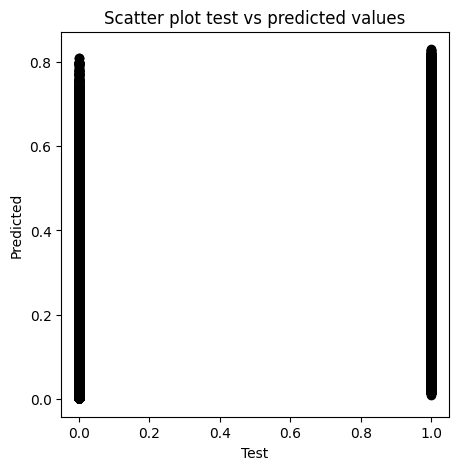

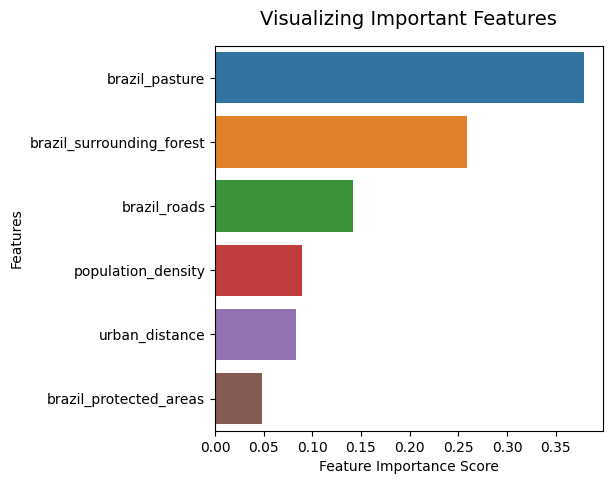

In [22]:
# On test set
y_pred_test, mae_test, mse_test, rmse_test, oob_score_test, r2_test, feature_imp_test = model_builder.evaluate(X_test=model_builder.X_test,
                                                                    y_test=model_builder.y_test,
                                                                    save_figures=False, saving_base_output_name='testing_test_set')

In [23]:
import numpy as np
np.max(y_pred_test)

0.8293197833937663

In [35]:
y_pred_test_prob = model_builder.model.predict_proba(model_builder.X_test)
y_pred_test_prob

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


array([[0.95525412, 0.04474588],
       [0.9430534 , 0.0569466 ],
       [0.99066975, 0.00933025],
       ...,
       [0.96693066, 0.03306934],
       [0.96933481, 0.03066519],
       [0.97011078, 0.02988922]])

In [38]:
y_pred_test_prob.shape

(59465, 2)

In [36]:
import numpy as np
y_pred_test_max = []
for value in y_pred_test_prob:
    y_pred_test_max.append(value[1])
y_pred_test_max = np.array(y_pred_test_max)
y_pred_test_max

array([0.04474588, 0.0569466 , 0.00933025, ..., 0.03306934, 0.03066519,
       0.02988922])

Text(0, 0.5, 'Predicted')

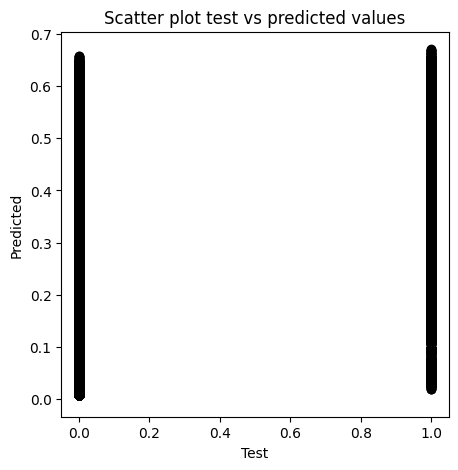

In [37]:
plt.figure(figsize=(5,5))
plt.plot(list(range(0, int(model_builder.y_test.max()))), ls='dashed', alpha=0.3)
plt.scatter(model_builder.y_test, y_pred_test_max, color='black')
plt.title("Scatter plot test vs predicted values")
plt.xlabel('Test')
plt.ylabel('Predicted')

In [27]:
# predictor = 'population_density'
# plt.scatter(model_builder.X_test[predictor].values, model_builder.y_test, color = 'green')
# plt.scatter(model_builder.X_test[predictor].values, y_pred_test, color = 'blue')
# plt.title('Random Forest Regression')
# plt.xlabel(predictor)
# plt.ylabel('Deforestation risk')
# plt.show()

# Inference on tiles

In [28]:
model_builder.inference(mask_band='elevation', 
                        tiles_folder_name='Brazil_Acre_Deforestation_Risk_inference_100km2_grid_scale30', 
                        tiles_in_GCP=False,   # Running locally
                        RF_output_folder_temp='TEST_RF_outputs_temp_Acre2_maxdepth8_500trees_6predictors',
                        path_to_tiles_local='/Users/margauxmforstyhe/Desktop/deforestation_risk/Brazil_Acre_Deforestation_Risk_inference_100km2_grid_scale30'
                       )


There are 31 inference tiles

Starting image: /Users/margauxmforstyhe/Desktop/deforestation_risk/Brazil_Acre_Deforestation_Risk_inference_100km2_grid_scale30/inference_tiles_scale30_8.tif
Image opened
tile shape: (3291, 3334, 6)
Reshaped from (3291, 3334, 6) to (10972194, 6)
(10972194, 6)


/usr/local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    3.3s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:   12.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:   28.3s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:   32.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Reshaped back to (3291, 3334)


ValueError: 'elevation' is not in list